# Final Assignment

## Resurch question:
Is there any effect between change political orientation and height difference of people of Korean penensula?

## Introduction
As the data trends indicate, the average height of human beings has been increased during the last two centuries. This increase could be observed almost all around the world but in mid 1900s countries show different rates in growth of height. One study back in 2006 comparing siblings concluded that 80 percent of difference in height is genetic but the rest of that is related to external forces which could affect the height [1]. In other words if DNA could predict the final height of a person there could be some external forces that can interrupt the growth [2].<br>Korean peninsula separated into two countries after Korean War and people living in that region are basically the same. GDP as a parameter affecting the living standard could be used but since we don"t have access to GDP of North Korea due to its exceptional condition, we could use Food Supply data from United Nations as an interpretation of GDP.
## Data
To better show the difference trends we must have annual height of men and women of countries by year, GDP, Food Intake, etc. For annual height of people, we used data from NCD-RisC [3]. GDP data is taken from World bank data base [4] and Food suplly from The Food and Agriculture Organization of the United Nations [5].

## Loading Data and Inspection

In [1]:
# Importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import yaml

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import Category10
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

Loading BokehJS ...

In [2]:
# opening the csv files from config file

with open("config.yaml", "r") as stream:
    config = yaml.safe_load(stream)

file_1 = config["directory_of_file1"]
file_2 = config["directory_of_file2"]
file_3 = config["directory_of_file3"]

df_GDP = pd.read_csv(file_1)
df_FS = pd.read_csv(file_2)
df_Height = pd.read_csv(file_3)



In [3]:
# we can check the first rows of datasets to see how we are going to use them
# df_GDP.head()
# df_FS.head()
df_Height.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077


In [22]:
# early inspection of data types of rows and columns

try:
    print(df_GDP.info)
    # df_GDP.info()
except:
    print("df not properly loaded")

<bound method DataFrame.info of                       Country Name  Year          GDP
0                            Aruba  1960          NaN
1      Africa Eastern and Southern  1960   162.913034
2                      Afghanistan  1960    62.369375
3       Africa Western and Central  1960   106.976475
4                           Angola  1960          NaN
...                            ...   ...          ...
16487                       Kosovo  2021  5269.783901
16488                  Yemen, Rep.  2021          NaN
16489                 South Africa  2021  7055.044776
16490                       Zambia  2021  1137.343633
16491                     Zimbabwe  2021  1773.920411

[16492 rows x 3 columns]>


In [5]:
# checking the types of columns that we have
# df_GDP.dtypes
# df_FS.dtypes
df_Height.dtypes

Country                                             object
ISO                                                 object
Sex                                                 object
Year of birth                                        int64
Mean height (cm)                                   float64
Mean height lower 95% uncertainty interval (cm)    float64
Mean height upper 95% uncertainty interval (cm)    float64
dtype: object

In [6]:
# checking NaN value cell to see if we have to change or even delet them
df_GDP.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              132
                 ... 
2018                9
2019               11
2020               14
2021               21
Unnamed: 66       266
Length: 67, dtype: int64

## Conclusion about Data Inspection
One of the main things to solve is to convert the rows of GDP file to columns in order to merge with other ones in order to better prepare the dataset for the final conclusion. Changing the NaN values and data types are also needed.

## Data Merging
In this part we try to combine all the data that we have based on year and countries that we want to compare. The changes in differnt parameters will be considered from 1961.

In [7]:
# For better filtering, we try to find countries with different dictations and merge all of them as one

mapping = {
            "Korea, Rep." : "South Korea",
            "Korea, Dem. People's Rep." : "North Korea",
}
df_GDP["Country Name"] = df_GDP["Country Name"].replace(mapping)
df_FS["Country"] = df_FS["Country"].replace(mapping)
df_Height["Country"] = df_Height["Country"].replace(mapping)

In [8]:
# When reported the height, the year of birth was considered which 18 years will be added to correct that
df_Height["Year of birth"] = df_Height["Year of birth"] + 18
FS_Height_df = (pd.merge(df_FS, df_Height[df_Height["Sex"] == "Men"], left_on=["Country", "Year"], right_on=["Country", "Year of birth"])).fillna(0)
# Format of the columns is also corrected for comparison
FS_Height_df["Year"] = FS_Height_df["Year"].astype("Int64")
FS_Height_df["Year of birth"] = FS_Height_df["Year of birth"].astype("int64")

In [9]:
# There are many columns that only have one value which don"t add any information. Those columns will be deleted
single_value_cols = [col for col in FS_Height_df.columns if FS_Height_df[col].nunique() == 1]
FS_Height_df = FS_Height_df.drop(single_value_cols, axis=1)
# Columns not of interest also deleted
FS_Height_df = FS_Height_df.drop(columns=["Food supply (Fat g per capita per day)", "ISO" ])
FS_Height_df.head()

,Country,Year,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
0,Afghanistan,1961,8790140,3054.9053,86.492840,1961,163.638285,158.456715,168.937749
1,Afghanistan,1962,8969055,2973.2468,84.580055,1962,163.708753,158.488334,168.986865
2,Afghanistan,1963,9157463,2751.7795,78.657250,1963,163.781053,158.608246,169.085754
3,Afghanistan,1964,9355510,3013.4424,85.198880,1964,163.855399,158.694542,169.134287
4,Afghanistan,1965,9565154,3017.7600,85.612100,1965,163.931093,158.780156,169.205013


In [10]:
# several columns are not needed and datatypes should be corrected
df_GDP = df_GDP.drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 66"], axis=1)
df_GDP = df_GDP.melt(id_vars="Country Name", var_name="Year", value_name="GDP")
df_GDP["Year"] = df_GDP["Year"].astype("int64")
# df_GDP

In [11]:
merged_df = (pd.merge(df_GDP, FS_Height_df, left_on=["Country Name", "Year"], right_on= ["Country", "Year"], how="outer"))
merged_df["Year"] = merged_df["Year"].astype("Int64")
FS_Height_df["Year of birth"] = FS_Height_df["Year of birth"].astype("int64")

# make a new DataFrame which could select several countries, but in this case we only care about south korea
selected_countries = ["South Korea", "North Korea"] 
merged_df = merged_df[merged_df["Country"].isin(selected_countries)]
merged_df.head()

,Country Name,Year,GDP,Country,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
392,South Korea,1961,93.831759,South Korea,26552230.0,2081.0708,55.248978,1961.0,166.980919,166.451080,167.503279
459,North Korea,1961,NaN,North Korea,11916512.0,1839.4991,60.158184,1961.0,165.695268,160.153336,171.222802
658,South Korea,1962,106.160111,South Korea,27234476.0,2119.8354,54.528120,1962.0,167.155824,166.632745,167.670529
725,North Korea,1962,NaN,North Korea,12180506.0,1857.7251,60.400433,1962.0,165.813446,160.237049,171.335859
924,South Korea,1963,146.303055,South Korea,27905876.0,2147.6390,54.517735,1963.0,167.333354,166.815981,167.841099


In [12]:
merged_df.isnull().sum()

Country Name                                        0
Year                                                0
GDP                                                54
Country                                             0
Population                                          0
Food supply (kcal per capita per day)               0
Food supply (Protein g per capita per day)          0
Year of birth                                       0
Mean height (cm)                                    0
Mean height lower 95% uncertainty interval (cm)     0
Mean height upper 95% uncertainty interval (cm)     0
dtype: int64

In [13]:
# Since we don"t compare GDP of these two countries it doesn"t matter if there are still NaN, but we dont need some extra columns anymore
merged_df.drop(["Country", "Year of birth"], axis=1, inplace=True)
merged_df.head()

,Country Name,Year,GDP,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
392,South Korea,1961,93.831759,26552230.0,2081.0708,55.248978,166.980919,166.451080,167.503279
459,North Korea,1961,NaN,11916512.0,1839.4991,60.158184,165.695268,160.153336,171.222802
658,South Korea,1962,106.160111,27234476.0,2119.8354,54.528120,167.155824,166.632745,167.670529
725,North Korea,1962,NaN,12180506.0,1857.7251,60.400433,165.813446,160.237049,171.335859
924,South Korea,1963,146.303055,27905876.0,2147.6390,54.517735,167.333354,166.815981,167.841099


## Data Analysis

### Hypothesis
To better understand the difference in the Food Consumption of South Koreans vs North Korean we can compare their differences after 1960. From 1960 Food Supply Difference between South and North Koreans increased gradually and this increase is much more for Protein product due to higher price. So we have a solid observation that Food Supply between the two countries are differnt and this difference has been increased.

In [14]:
# first we separate the data of two countries and make colors
grouped = merged_df.groupby("Country Name")
colors = ["red", "blue"]

# we make an object of figure function and use line method for the plot
plot1 = figure(title="Food supply kcal per capita per day", x_axis_label="Year", y_axis_label="Food supply (kcal per capita per day)")
plot2 = figure(title="Food supply Protein gr per capita per day", x_axis_label="Year", y_axis_label="Food supply (Protein g per capita per day)")

for i, (name, group) in enumerate(grouped):
    plot1.line(group["Year"], group["Food supply (kcal per capita per day)"], line_color= colors[i], line_width=3, legend_label=name)
    plot2.line(group["Year"], group["Food supply (Protein g per capita per day)"], line_color=colors[i], line_width=3, legend_label=name)

# Position of Legend and the ability to interactivly fade it, however this will be more practical if we want to compare two countries out of several others
plot1.legend.location = plot2.legend.location = "top_left"
plot1.legend.click_policy = plot2.legend.click_policy = "mute"

grid = gridplot([[plot1, plot2]])
show(grid)

In [15]:
merged_df.head(3)

,Country Name,Year,GDP,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
392,South Korea,1961,93.831759,26552230.0,2081.0708,55.248978,166.980919,166.451080,167.503279
459,North Korea,1961,NaN,11916512.0,1839.4991,60.158184,165.695268,160.153336,171.222802
658,South Korea,1962,106.160111,27234476.0,2119.8354,54.528120,167.155824,166.632745,167.670529


In [16]:
# showing heat trends of North and South Korea and their respective 95% CI band as shaded

country_data = {}
for country in merged_df["Country Name"].unique():
    country_df = merged_df[merged_df["Country Name"] == country]
    source = ColumnDataSource(country_df)
    country_data[country] = source

figures = []
colors = Category10[3]
for i, (country, source) in enumerate(country_data.items()):
    # Create a figure
    fig = figure(title="Height trend for {}".format(country), x_axis_label="Year", y_axis_label="Mean height (cm)", plot_width=600, plot_height=400)
    # line curves
    fig.line("Year", "Mean height (cm)", source=source, line_width=2, color=colors[i])

    # for making the shaded area between the upper and lower 95% CI
    fig.varea("Year", y1="Mean height lower 95% uncertainty interval (cm)", y2="Mean height upper 95% uncertainty interval (cm)", source=source, fill_alpha=0.1, fill_color=colors[i])
    fig.add_tools(HoverTool(tooltips=[("Year", "@Year"), ("Mean height", "@{Mean height (cm)}{0.00}")], mode="vline"))
    figures.append(fig)

grid = gridplot(figures, ncols=2)

show(grid)


In [17]:
# calculate the height difference from the previous year for each country and make a new column named "Height difference"
merged_df.sort_values(["Country Name", "Year"], inplace=True)
merged_df["Height difference"] = merged_df.groupby("Country Name")["Mean height (cm)"].diff()
merged_df.dropna(subset=["Height difference"], inplace=True)

merged_df.head(3)

,Country Name,Year,GDP,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Height difference
725,North Korea,1962,NaN,12180506.0,1857.7251,60.400433,165.813446,160.237049,171.335859,0.118178
991,North Korea,1963,NaN,12475236.0,1951.6400,62.901222,165.937139,160.343216,171.452902,0.123693
1257,North Korea,1964,NaN,12787529.0,2016.9807,64.601010,166.066402,160.492812,171.567408,0.129263


### Data Inspection
In order to begin statistical analysis we have to examine our data to see if we could use T test method. One way would be to check if height per year of South Koreans and North Koreans are normally distributed. The other is to use a Q-Q plot. In a Q-Q plot, the observed data is plotted against the expected values of a normal distribution. If the data is normally distributed, the points will approximately follow a straight line. You can create separate Q-Q plots for South Korean and North Korean heights for each year and visually inspect whether the points follow a straight line.

In [18]:
def DS_Q_Q_Plot(y, est = "ML", title=None, **kwargs,):
    """
    *
    Function DS_Q_Q_Plot(y, est = "robust", **kwargs)
    
       This function makes a normal quantile-quantile plot (Q-Q-plot), also known
       as a probability plot, to visually check whether data follow a normal distribution.
    
    Requires:            - 
    
    Arguments:
      y                  data array
      est                Estimation method for normal parameters mu and sigma:
                         either "robust" (default), or "ML" (Maximum Likelihood),
                         or "preset" (given values)
      N.B. If est="preset" than the *optional* parameters mu, sigma must be provided:
      mu                 preset value of mu
      sigma              preset value of sigma
      title              you can add an axtension to this title "Q-Q plot"
      
    Returns:
      Estimated mu, sigma, n, and expected number of datapoints outside CI in Q-Q-plot.
      Q-Q-plot
      
    Author:            M.E.F. Apol
    Date:              2020-01-06, revision 2022-08-30
    """
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    import matplotlib.pyplot as plt
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get("mu", None)
    sigma_0 = kwargs.get("sigma", None)
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.var(y)
    sigma_ML = np.std(y) # biased estimate
    s2 = np.var(y, ddof=1)
    s = np.std(y, ddof=1) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == "ML":
        mu, sigma = mu_ML, s
    elif est == "robust":
        mu, sigma = mu_R, sigma_R
    elif est == "preset":
        mu, sigma = mu_0, sigma_0
    else:
        print("Wrong estimation method chosen!")
        return()
        
    print("Estimation method: " + est)
    print("n = {:d}, mu = {:.4g}, sigma = {:.4g}".format(n, mu,sigma))
    
    # Expected number of deviations (95% confidence level):
    n_dev = np.round(0.05*n)
    
    print("Expected number of data outside CI: {:.0f}".format(n_dev))
         
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    plt.plot(z_th, z_i, "o", color="k", label="experimental data")
    plt.plot(z_th, z_th, "--", color="r", label="normal line")
    plt.plot(z_th, CI_upper, "--", color="b", label="95% CI")
    plt.plot(z_th, CI_lower, "--", color="b")
    plt.xlabel("Theoretical quantiles, $z_{(i)}$")
    plt.ylabel("Sample quantiles, $z_i$")
    plt.title("Q-Q plot (" + est + ")" + title if title else "")
    plt.legend(loc="best")
    
    # plt.show()
    # instead of plotting directly we use gcf to return the current figure object
    return plt.gcf()

Estimation method: ML
n = 53, mu = 0.1498, sigma = 0.05901
Expected number of data outside CI: 3
Estimation method: ML
n = 53, mu = 0.1188, sigma = 0.01565
Expected number of data outside CI: 3


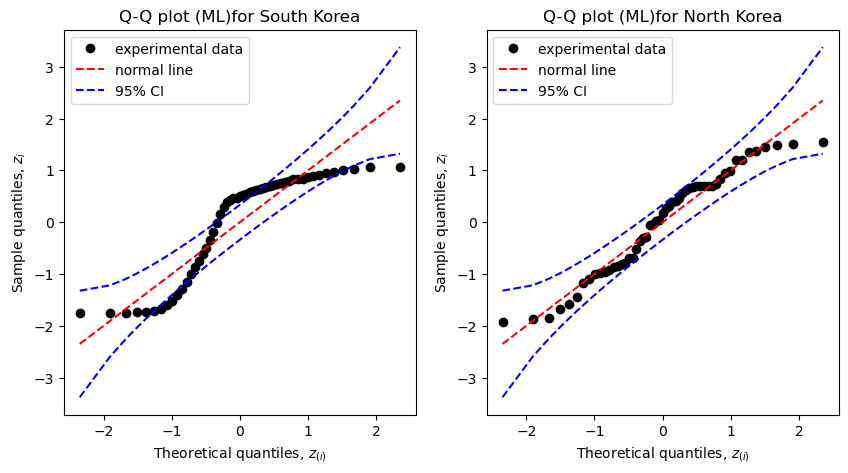

In [19]:
#For plotting the two QQ plots next two each other
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, country in enumerate(["South Korea", "North Korea"]):
    plt.sca(axs[i])
    DS_Q_Q_Plot(merged_df.loc[merged_df["Country Name"] == country, "Height difference"].tolist(), title=f"for {country}")

Since nearly most of the data is in the 95% CI we can consider a normal behavior. However two slopes could show two subgruops, however we can consider lower increase in the height as a normal behaviour in people.

### Statistical Analysis on Data
Since we have now enough knowlege about the data we could use an independent T-test between two samples to see if there are a significant change in the height of two countries.

In [20]:
def DS_2sample_ttest_means(y1, y2, equal_var=False, alternative="two-sided", alpha=0.05):
    """
    *
    Function DS_2sample_ttest_means(y1, y2, equal_var=False, alternative="two-sided", alpha=0.05)
    
       This function performs a 2-sample (Welch"s) t-test (Null Hypothesis Significance Test) 
       in the spirit of R, testing 2 averages with *unknown* standard deviation.
       The function also evaluates the effect size (Cohen"s d).
       
    Requires:          -
       
    Usage:             DS_2sample_ttest_means(y1, y2, 
                            alternative=["two-sided"]/"less"/"greater",
                            equal_var=[False]/True, alpha = 0.05)
     
                         alternative = "two-sided" [default]  H1: mu_1 != mu_2
                                       "less"                 H1: mu_1 < mu_2
                                       "greater"              H1: mu_1 > mu_2
                         equal_var = False                    perform Welch t-test
                                     True                     perform 2-sample t-test
                         alpha:   significance level of test [default: 0.05]
     
    Return:            t, p-value, t.crit.L, t.crit.R  [ + print interpretable output to stdout ]
                       where t.crit.L and t.crit.R are the lower and upper critical values, 
                       t is the test statistic and p-value is the p-value of the test.     
     
    Author:            M.E.F. Apol
    Date:              2022-01-28, rev. 2022_08_26
    Validation:
    """
    
    from scipy.stats import ttest_ind
    from scipy.stats import t as t_distr
    import numpy as np
    
    t, p_samp = ttest_ind(y1, y2, equal_var = equal_var)
    y_av_1 = np.mean(y1)
    y_av_2 = np.mean(y2)
    n_1 = len(y1)
    n_2 = len(y2)
    s2_1 = np.var(y1, ddof=1)
    s2_2 = np.var(y2, ddof=1)
    print(80*"-")
    if equal_var == True:
        print("2-sample t-test for 2 means:")
        print("     assuming Normal(mu.1, sigma2) data for dataset 1")
        print("     assuming Normal(mu.2, sigma2) data for dataset 2")
        df = n_1 + n_2 - 2
    else:
        print("Welch t-test for 2 means:")
        df = (s2_1/n_1 + s2_2/n_2)**2 / ( 1/(n_1-1)*(s2_1/n_1)**2 + 1/(n_2-1)*(s2_2/n_2)**2 )
        print("     assuming Normal(mu.1, sigma2.1) data for dataset 1")
        print("     assuming Normal(mu.2, sigma2.2) data for dataset 2")
    print("y.av.1 = {:.3g}, y.av.2 = {:.3g}, s2.1 = {:.3g}, s2.2 = {:.3g}, n.1 = {:d}, n.2 = {:d}, alpha = {:.3g}".format(y_av_1, y_av_2, s2_1, s2_2, n_1, n_2, alpha))
    print("H0: mu.1  = mu.2")
    if alternative == "two-sided":
        print("H1: mu.1 != mu.2")
        p_value = p_samp
        t_crit_L = t_distr.ppf(alpha/2, df)
        t_crit_R = t_distr.ppf(1-alpha/2, df)      
    elif alternative == "less":
        print("H1: mu.1  < mu.2")
        if t <= 0:
            p_value = p_samp/2
        else:
            p_value = 1 - p_samp/2
        t_crit_L = t_distr.ppf(alpha, df)
        t_crit_R = float("inf")
    elif alternative == "greater":
        print("H1: mu.1  > mu.2")
        if t >= 0:
            p_value = p_samp/2
        else:
            p_value = 1 - p_samp/2
        t_crit_L = float("-inf")
        t_crit_R = t_distr.ppf(1-alpha, df)
    else:
        print("Wrong alternative hypothesis chosen!")
        print(80*"-" + "\n")
        t, p_value, t_crit_L, t_crit_R = np.nan, np.nan, np.nan, np.nan
        return(t, p_value, t_crit_L, t_crit_R)
    
    # Effect size (Cohen"s d.av):
    d_av = t * np.sqrt(1/n_1 + 1/n_2)
    print("t = {:.4g}, p-value = {:.4g}, t.crit.L = {:.4g}, t.crit.R = {:.4g}, df = {:.4g}".format(t, p_value, t_crit_L, t_crit_R, df))
    print("Effect size: d.av = {:.3g}; benchmarks |d.av|: 0.2 = small, 0.5 = medium, 0.8 = large".format(d_av))
    print(80*"-" + "\n")
    return(t, p_value, t_crit_L, t_crit_R)

In [21]:
DS_2sample_ttest_means(merged_df.loc[merged_df["Country Name"] == "South Korea", "Height difference"].tolist(), 
                       merged_df.loc[merged_df["Country Name"] == "North Korea", "Height difference"].tolist())


--------------------------------------------------------------------------------
Welch t-test for 2 means:
     assuming Normal(mu.1, sigma2.1) data for dataset 1
     assuming Normal(mu.2, sigma2.2) data for dataset 2
y.av.1 = 0.15, y.av.2 = 0.119, s2.1 = 0.00348, s2.2 = 0.000245, n.1 = 53, n.2 = 53, alpha = 0.05
H0: mu.1  = mu.2
H1: mu.1 != mu.2
t = 3.693, p-value = 0.0004848, t.crit.L = -2.001, t.crit.R = 2.001, df = 59.28
Effect size: d.av = 0.717; benchmarks |d.av|: 0.2 = small, 0.5 = medium, 0.8 = large
--------------------------------------------------------------------------------



(3.6929243738178026,
 0.0004848289847186249,
 -2.000798995209262,
 2.0007989952092617)

## Conclusion

We had a Hypothesis as if there would be a difference in height of people giving an ancrease in the amount of food supply.
Since the P-value is much less than 0.05 we can conclude that thre is a difference in the average increase of height between the two countries. Also we can conclude from the fact that after a sudden increase in 1970s we can see the highest difference in height between the two countries. However, there are two things that must be faced analysing these data. Firstly statistical significance alone is not enough, that is other factors Including decrease in infants death, higher quality of household, etc. could play a big role in increasing the average height. Seconly higher value between the higher and lower 95% CI indicates that there is a high probability that the true population mean height could be a little off, and in this case North Korea.

### References:
[1]. Assumption-Free Estimation of Heritability from Genome-Wide Identity-by-Descent Sharing between Full Siblings. (Visscher et al. 2006)<br>[2]. Health, Height and the Household at the Turn of the 20th Century. (Bailey et al. 2016)<br>[3] https://ncdrisc.org/data-downloads-height.html <br>[4] https://data.worldbank.org/ <br>[5] https://www.fao.org/faostat/en/#data